In [1]:
"""
------------------------------------------------------------------------------
Libraries
------------------------------------------------------------------------------
"""

import pandas as pd
import geopandas as gpd


In [2]:
"""
------------------------------------------------------------------------------
Load GeoJson files
------------------------------------------------------------------------------
"""

admin_areas = gpd.read_file("../data/raw/Prognoseräume.json")

building_agegroup = gpd.read_file("../data/raw/Gebaeudealter.geojson")


In [3]:
building_agegroup.head()

,schluessel,freistehen,anderertyp,doppelhaus,gereihtes,x_bis_1900,x1901_1910,x1911_1920,x1921_1930,x1931_1940,...,x1971_1980,x1981_1990,x1991_2000,x2001_2010,x2011_2015,ueberw_dekade_woh_neu,ew2015,typ,typklar,geometry
0,0100980071000100,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,None,1971-1980,267.0,9.0,Großsiedlungen und Punkthochhäuser (1960er-198...,"POLYGON ((389747.76 5821227.617, 389770.462 58..."
1,0100980081000100,4.0,2.0,NaN,12.0,12.0,NaN,1.0,1.0,NaN,...,1.0,1.0,1.0,1.0,1 - 3,bis 1900,414.0,2.0,"Geschlossene Blockbebauung, Hinterhof (1870er-...","POLYGON ((390067.012 5821486.085, 390085.186 5..."
2,0100980081000200,3.0,2.0,1.0,16.0,5.0,4.0,3.0,2.0,2.0,...,2.0,1.0,3.0,NaN,None,bis 1900,515.0,7.0,"Entkernte Blockrandbebauung, Lückenschluss nac...","POLYGON ((389886.906 5821382.847, 389910.301 5..."
3,0100980211000000,1.0,2.0,NaN,8.0,4.0,NaN,2.0,NaN,NaN,...,NaN,NaN,1.0,4.0,None,gemischte Baualtersklasse,132.0,2.0,"Geschlossene Blockbebauung, Hinterhof (1870er-...","POLYGON ((389898.887 5820411.531, 389909.613 5..."
4,0100980221000000,NaN,NaN,1.0,3.0,2.0,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,None,bis 1900,3.0,2.0,"Geschlossene Blockbebauung, Hinterhof (1870er-...","POLYGON ((389997.484 5820475.869, 390026.528 5..."


In [4]:
#Convert polygon into centroid
building_agegroup["centroid"] = building_agegroup.geometry.centroid
df_Building_agegroup = building_agegroup.drop(columns = "geometry")

df_Building_agegroup.head()

,schluessel,freistehen,anderertyp,doppelhaus,gereihtes,x_bis_1900,x1901_1910,x1911_1920,x1921_1930,x1931_1940,...,x1971_1980,x1981_1990,x1991_2000,x2001_2010,x2011_2015,ueberw_dekade_woh_neu,ew2015,typ,typklar,centroid
0,0100980071000100,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,None,1971-1980,267.0,9.0,Großsiedlungen und Punkthochhäuser (1960er-198...,POINT (389791.841 5821277.22)
1,0100980081000100,4.0,2.0,NaN,12.0,12.0,NaN,1.0,1.0,NaN,...,1.0,1.0,1.0,1.0,1 - 3,bis 1900,414.0,2.0,"Geschlossene Blockbebauung, Hinterhof (1870er-...",POINT (390177.214 5821376.449)
2,0100980081000200,3.0,2.0,1.0,16.0,5.0,4.0,3.0,2.0,2.0,...,2.0,1.0,3.0,NaN,None,bis 1900,515.0,7.0,"Entkernte Blockrandbebauung, Lückenschluss nac...",POINT (389984.292 5821393.366)
3,0100980211000000,1.0,2.0,NaN,8.0,4.0,NaN,2.0,NaN,NaN,...,NaN,NaN,1.0,4.0,None,gemischte Baualtersklasse,132.0,2.0,"Geschlossene Blockbebauung, Hinterhof (1870er-...",POINT (389959.629 5820419.722)
4,0100980221000000,NaN,NaN,1.0,3.0,2.0,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,None,bis 1900,3.0,2.0,"Geschlossene Blockbebauung, Hinterhof (1870er-...",POINT (390030.14 5820458.208)


In [5]:
"""
------------------------------------------------------------------------------
Checking invalid geometries
------------------------------------------------------------------------------
"""
df_Building_agegroup = df_Building_agegroup.set_geometry("centroid") 

#Check the combined dataframe for empty or invalid geometries
print(f"Empty geometry in df_Building_agegroup: {len(df_Building_agegroup[df_Building_agegroup.is_empty])}")
print(f"Invalid in df_Building_agegroup: {len(df_Building_agegroup[~df_Building_agegroup.is_valid])}")

Leere Geometrien in df_Building_agegroup: 0
Ungültige Geometrien in df_Building_agegroup: 0


In [6]:
"""
------------------------------------------------------------------------------
Data exploration
------------------------------------------------------------------------------
"""

df_Building_agegroup.shape

(13091, 23)

In [7]:

df_Building_agegroup.columns

Index(['schluessel', 'freistehen', 'anderertyp', 'doppelhaus', 'gereihtes',
       'x_bis_1900', 'x1901_1910', 'x1911_1920', 'x1921_1930', 'x1931_1940',
       'x1941_1950', 'x1951_1960', 'x1961_1970', 'x1971_1980', 'x1981_1990',
       'x1991_2000', 'x2001_2010', 'x2011_2015', 'ueberw_dekade_woh_neu',
       'ew2015', 'typ', 'typklar', 'centroid'],
      dtype='object')

In [8]:
df_Building_agegroup.isna().sum()

schluessel                   0
freistehen                3124
anderertyp                7600
doppelhaus                6767
gereihtes                 4517
x_bis_1900                8876
x1901_1910                8929
x1911_1920                8906
x1921_1930                6941
x1931_1940                6476
x1941_1950               10094
x1951_1960                6682
x1961_1970                7070
x1971_1980                7069
x1981_1990                7076
x1991_2000                6488
x2001_2010                8182
x2011_2015               10256
ueberw_dekade_woh_neu        0
ew2015                      27
typ                          0
typklar                      0
centroid                     0
dtype: int64

In [9]:
df_Building_agegroup.dtypes

schluessel                 object
freistehen                float64
anderertyp                float64
doppelhaus                float64
gereihtes                 float64
x_bis_1900                float64
x1901_1910                float64
x1911_1920                float64
x1921_1930                float64
x1931_1940                float64
x1941_1950                float64
x1951_1960                float64
x1961_1970                float64
x1971_1980                float64
x1981_1990                float64
x1991_2000                float64
x2001_2010                float64
x2011_2015                 object
ueberw_dekade_woh_neu      object
ew2015                    float64
typ                       float64
typklar                    object
centroid                 geometry
dtype: object

In [10]:
cols = ['x_bis_1900', 'x1901_1910', 'x1911_1920', 'x1921_1930', 'x1931_1940',
        'x1941_1950', 'x1951_1960', 'x1961_1970', 'x1971_1980', 'x1981_1990',
        'x1991_2000', 'x2001_2010', 'x2011_2015']

#change value "1-3" into 3
df_Building_agegroup[cols] = df_Building_agegroup[cols].replace({"1 - 3": 3}) 

#Convert column into numeric value int and fill all NAs with 0
df_Building_agegroup[cols] = df_Building_agegroup[cols].apply(pd.to_numeric).fillna(0).astype(int)



<Axes: >

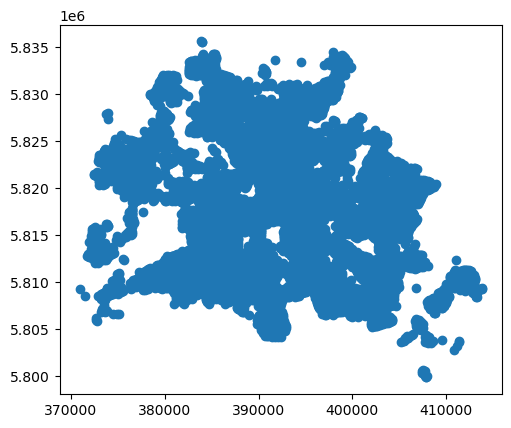

In [11]:
df_Building_agegroup.plot()

In [12]:
"""
------------------------------------------------------------------------------
CSR (coordinate reference system)
------------------------------------------------------------------------------
"""

#Check CRS
print(admin_areas.crs)
print(df_Building_agegroup.crs)

EPSG:4326
EPSG:25833


In [13]:
#Ensure both GeoDataFrames have the same CRS 
if admin_areas.crs != df_Building_agegroup.crs:
    df_Building_agegroup = df_Building_agegroup.to_crs(admin_areas.crs)

In [14]:

"""
------------------------------------------------------------------------------
Functions
building age range by admin area
------------------------------------------------------------------------------
"""


def calculate_buildings_byAge(admin_area, df_Building_agegroup):
    #find intersections between the building dataframe and admin areas
    intersections = df_Building_agegroup[df_Building_agegroup.intersects(admin_area.geometry)]
    age_groups = ['x_bis_1900', 'x1901_1910', 'x1911_1920', 'x1921_1930', 'x1931_1940',
                  'x1941_1950', 'x1951_1960', 'x1961_1970', 'x1971_1980', 'x1981_1990',
                  'x1991_2000', 'x2001_2010', 'x2011_2015']
    age_group_counts = {age_group: intersections[age_group].sum() for age_group in age_groups}

    print(f"Admin Area: {admin_area["pgr_name"]}, age_group_counts: {age_group_counts}")
    
    return age_group_counts

In [15]:
#Calculation of age_group_counts for each administrative area
admin_areas["age_group_counts"] = admin_areas.apply(
    lambda row: calculate_buildings_byAge(row, df_Building_agegroup), axis=1
)

admin_areas.head()

Admin Area: Südlicher Prenzlauer Berg, age_group_counts: {'x_bis_1900': 1021, 'x1901_1910': 508, 'x1911_1920': 216, 'x1921_1930': 24, 'x1931_1940': 41, 'x1941_1950': 11, 'x1951_1960': 133, 'x1961_1970': 26, 'x1971_1980': 10, 'x1981_1990': 56, 'x1991_2000': 73, 'x2001_2010': 146, 'x2011_2015': 52}
Admin Area: Kreuzberg Süd, age_group_counts: {'x_bis_1900': 1422, 'x1901_1910': 355, 'x1911_1920': 195, 'x1921_1930': 35, 'x1931_1940': 8, 'x1941_1950': 20, 'x1951_1960': 223, 'x1961_1970': 91, 'x1971_1980': 56, 'x1981_1990': 81, 'x1991_2000': 57, 'x2001_2010': 44, 'x2011_2015': 33}
Admin Area: Marienfelde / Lichtenrade, age_group_counts: {'x_bis_1900': 100, 'x1901_1910': 122, 'x1911_1920': 212, 'x1921_1930': 636, 'x1931_1940': 1524, 'x1941_1950': 210, 'x1951_1960': 903, 'x1961_1970': 2431, 'x1971_1980': 2990, 'x1981_1990': 2132, 'x1991_2000': 886, 'x2001_2010': 607, 'x2011_2015': 313}
Admin Area: Wilhelmstadt / Staaken, age_group_counts: {'x_bis_1900': 270, 'x1901_1910': 349, 'x1911_1920': 57

,id,pgr_id,pgr_name,bez,finhalt,stand,geometry,age_group_counts
0,c_lor_pgr_2021.0370,0370,Südlicher Prenzlauer Berg,03 - Pankow,3.031117e+06,01.01.2021,"MULTIPOLYGON (((13.41975 52.52555, 13.42016 52...","{'x_bis_1900': 1021, 'x1901_1910': 508, 'x1911..."
1,c_lor_pgr_2021.0220,0220,Kreuzberg Süd,02 - Friedrichshain-Kreuzberg,4.746309e+06,01.01.2021,"MULTIPOLYGON (((13.40772 52.48875, 13.40789 52...","{'x_bis_1900': 1422, 'x1901_1910': 355, 'x1911..."
2,c_lor_pgr_2021.0760,0760,Marienfelde / Lichtenrade,07 - Tempelhof-Schöneberg,1.919254e+07,01.01.2021,"MULTIPOLYGON (((13.35912 52.4199, 13.35902 52....","{'x_bis_1900': 100, 'x1901_1910': 122, 'x1911_..."
3,c_lor_pgr_2021.0520,0520,Wilhelmstadt / Staaken,05 - Spandau,2.301526e+07,01.01.2021,"MULTIPOLYGON (((13.15724 52.50162, 13.15726 52...","{'x_bis_1900': 270, 'x1901_1910': 349, 'x1911_..."
4,c_lor_pgr_2021.0330,0330,Nördliches Weißensee,03 - Pankow,2.222540e+07,01.12.2021,"MULTIPOLYGON (((13.43357 52.58232, 13.43362 52...","{'x_bis_1900': 104, 'x1901_1910': 68, 'x1911_1..."


In [16]:
data = admin_areas[["pgr_id", "pgr_name", "age_group_counts"]]

In [17]:
#Determine the age group with the highest count for each admin area
#Each dictionary maps age groups (as keys) to their respective counts (as values)
# x represents each dictionary in column age_group_counts
#x.items() converts the dictionary into a list of tuples, where each tuple consists of an age group and its count. 
#The max() function is used to find the tuple with the highest count. The key parameter specifies that the second element of the tuple (item[1], which is the count
data["max_age_group"] = data["age_group_counts"].apply(lambda x: max(x.items(), key=lambda item: item[1]))

#Data frame
df_maxAge_building = pd.DataFrame(data[["pgr_id", "pgr_name", "max_age_group"]])

df_maxAge_building.head(20)

/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_31413/2998272700.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["max_age_group"] = data["age_group_counts"].apply(lambda x: max(x.items(), key=lambda item: item[1]))


,pgr_id,pgr_name,max_age_group
0,0370,Südlicher Prenzlauer Berg,"(x_bis_1900, 1021)"
1,0220,Kreuzberg Süd,"(x_bis_1900, 1422)"
2,0760,Marienfelde / Lichtenrade,"(x1971_1980, 2990)"
3,0520,Wilhelmstadt / Staaken,"(x1961_1970, 1601)"
4,0330,Nördliches Weißensee,"(x1991_2000, 2973)"
5,0740,Tempelhof,"(x1921_1930, 1796)"
6,1130,Lichtenberg Nord,"(x1971_1980, 633)"
7,1140,Lichtenberg Mitte,"(x1961_1970, 539)"
8,1020,Hellersdorf,"(x1981_1990, 2882)"
9,0310,Buch,"(x1971_1980, 254)"


In [18]:
#CSV
#df_maxAge_building.to_csv("MaxAgeGroup_building_byAdminArea.csv", index= False)